np data: (50, 4)


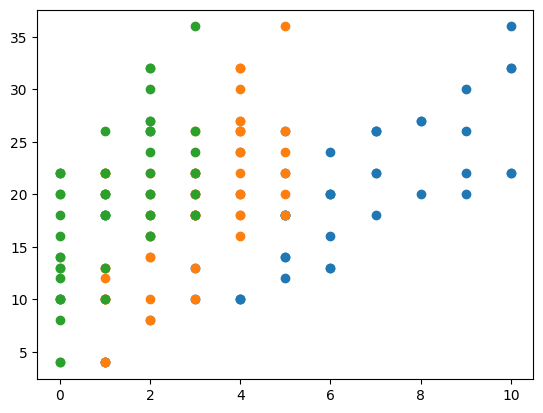

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np

data = []
for i in range(50):
    device_age = random.randint(1,10)
    number_of_residents = random.choice([1,2,3,4,5])
    number_of_children = number_of_residents - 2
    if number_of_children < 0:
        number_of_children = 0
    breakdown_probability = 100*(0.02*device_age + 0.02*number_of_residents + 0.02*number_of_children)
    row = [device_age,
            number_of_residents,
            number_of_children,
            int(breakdown_probability)]
    data.append(row)

data = np.array(data)
print("np data:", data.shape)
#for item in data:
#    print(item)
plt.scatter(data[:, 0], data[:, 3])  # by age
plt.scatter(data[:, 1], data[:, 3])  # by residents
plt.scatter(data[:, 2], data[:, 3])  # by children
plt.show()